In [214]:
# ! jupyter nbconvert --to python --RegexRemovePreprocessor.patterns="^%"  train_and_run.ipynb

# RULES:
# 1. Do not make plot.show() only plot.savefig()

In [2]:
%load_ext autoreload
%autoreload 2

## Make sweep

In [108]:
# # https://docs.wandb.ai/guides/sweeps/walkthrough

import os
machine_name = os.uname()[1]
import wandb
wandb.init(project="rotor-gp", save_code=True, notes="hello", id=machine_name, mode='disabled')

# sweep_configuration = {
#     'method': 'random',
#     'metric': 
#     {
#         'goal': 'minimize', 
#         'name': 'score'
#         },
#     'parameters': 
#     {
#         'x': {'max': 0.1, 'min': 0.01},
#         'y': {'values': [1, 3, 7]},
#      }
# }

## Data loading part

In [57]:
from prepare_model import prepare_data, sample_data, prepare_model


In [135]:
# Hyperparameters:
hparams = {
        'dtype' : 'float32',
        'device' : 'gpu'
        }

# Descriptors parameters:
# https://github.com/lab-cosmo/librascal/blob/master/examples/MLIP_example.ipynb
soap_params = {
# 'species': ["H", "C", "O", "N", "Si"],
# 'periodic': True,
'interaction_cutoff': 3.5,
'gaussian_sigma_constant': 0.3,
'max_radial': 3,
'max_angular': 3,
'cutoff_smooth_width': 0.5,
# 'average': "off",
# 'crossover': True,
# 'dtype': "float64",
# 'n_jobs': 10,
# 'sparse': False,
# 'positions': [7, 11, 15] # ignored
}


fdm = prepare_data(hparams, soap_params, traj_sample_rate=1)

Saving data to directory:  /misc/home/qklmn/repos/rotor-gp/results/train_and_run/2023-08-24_20 40-50_408508
Loading training data...
Length of the train trajectory:  400
Total number of frames is 400
Total number of batches is 400
Total length of traj is 400
Total number of batches 400
Calculating invariants on trajectory with librascal...


100%|██████████| 400/400 [01:23<00:00,  4.79it/s]


Total number of frames is 20
Total number of batches is 20
Total length of traj is 20
Total number of batches 20
Calculating invariants on trajectory with librascal...


100%|██████████| 20/20 [00:03<00:00,  5.00it/s]



-----------
Group  0
-----------
Number of training points for group 0:  14400
Number of test points for group 0:  720

-----------
Group  1
-----------
Number of training points for group 1:  14400
Number of test points for group 1:  720

-----------
Group  2
-----------
Number of training points for group 2:  21600
Number of test points for group 2:  1080

-----------
Group  3
-----------
Number of training points for group 3:  129600
Number of test points for group 3:  6480

-----------
Group  4
-----------
Number of training points for group 4:  7200
Number of test points for group 4:  360

-----------
Group  5
-----------
Number of training points for group 5:  7200
Number of test points for group 5:  360

-----------
Group  6
-----------
Number of training points for group 6:  14400
Number of test points for group 6:  720

-----------
Group  7
-----------
Number of training points for group 7:  14400
Number of test points for group 7:  720

-----------
Group  8
-----------
Numbe

In [136]:
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

train_data_loaders = sample_data(fdm, N_samples=1000)

Dataloader for group 0 created
Number of samples in dataloader: 1000
Dataloader for group 1 created
Number of samples in dataloader: 1000
Dataloader for group 2 created
Number of samples in dataloader: 1000
Dataloader for group 3 created
Number of samples in dataloader: 1000
Dataloader for group 4 created
Number of samples in dataloader: 1000
Dataloader for group 5 created
Number of samples in dataloader: 1000
Dataloader for group 6 created
Number of samples in dataloader: 1000
Dataloader for group 7 created
Number of samples in dataloader: 1000
Dataloader for group 8 created
Number of samples in dataloader: 1000
Dataloader for group 9 created
Number of samples in dataloader: 1000
Dataloader for group 10 created
Number of samples in dataloader: 1000
Dataloader for group 11 created
Number of samples in dataloader: 1000
Dataloader for group 12 created
Number of samples in dataloader: 1000
Dataloader for group 13 created
Number of samples in dataloader: 1000


## Training part

In [141]:
os.getcwd()

'/misc/home/qklmn/repos/rotor-gp/results/train_and_run/2023-08-24_20 40-50_408508'

In [137]:
hparams['dtype'] = 'float32'
hparams['device'] = 'gpu'

# per AG steps and learning rate
n_steps = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 600] 
learning_rate = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

AG_force_model = prepare_model(
    train_data_loaders, 
    hparams, soap_params, 
    n_steps, 
    learning_rate, 
    gpu_id=0)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized

ModelForces initialized


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU avai

Training force model 0 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 25.32it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 20.86it/s, v_num=0]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)



Training force model 1 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 32.07it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 25.61it/s, v_num=1]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 2 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.24it/s, v_num=2]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 25.98it/s, v_num=2]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 3 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.20it/s, v_num=3]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 25.95it/s, v_num=3]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 4 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.56it/s, v_num=4]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 26.30it/s, v_num=4]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 5 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.54it/s, v_num=5]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 26.53it/s, v_num=5]
Training force model 6 (Total 14 models)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.63it/s, v_num=6]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 26.25it/s, v_num=6]
Training force model 7 (Total 14 models)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.53it/s, v_num=7]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 26.29it/s, v_num=7]
Training force model 8 (Total 14 models)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 40.85it/s, v_num=8]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 31.98it/s, v_num=8]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)



Training force model 9 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 42.13it/s, v_num=9]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 32.62it/s, v_num=9]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)



Training force model 10 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 42.08it/s, v_num=10]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 33.15it/s, v_num=10]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 11 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 41.42it/s, v_num=11]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 32.62it/s, v_num=11]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 12 (Total 14 models)
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 41.09it/s, v_num=12]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 32.54it/s, v_num=12]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name       | Type                       | Params
----------------------------------------------------------
0 | likelihood | GaussianLikelihood         | 1     
1 | model      | ExactGPModelForces         | 542   
2 | mll        | ExactMarginalLogLikelihood | 542   
----------------------------------------------------------
542       Trainable params
0         Non-trainable params
542       Total params
0.002     Total estimated model params size (MB)


Training force model 13 (Total 14 models)
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 16.56it/s, v_num=13]

`Trainer.fit` stopped: `max_epochs=600` reached.


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 15.05it/s, v_num=13]



In [79]:
AG_force_model.models[0].train_x.device

device(type='cpu')

## Testing part

In [139]:
### TESTING PREDICITONS ###

# os.makedirs("")

from fande.predict import PredictorASE


AG_force_model.eval()

predictor = PredictorASE(
            fdm,
            AG_force_model,
            hparams,
            soap_params
)

rmse_per_model, mae_per_model = predictor.test_errors(view_worst_atoms=True)

# rmse_per_model

Error metrics for atomic group  0
RMSE:  0.30403683
MAE:  0.2395168
Max error:  0.93454015
Error metrics for atomic group  1
RMSE:  0.2842073
MAE:  0.211183
Max error:  1.0437183
Error metrics for atomic group  2
RMSE:  0.29275835
MAE:  0.23110506
Max error:  1.0554835
Error metrics for atomic group  3
RMSE:  0.33497414
MAE:  0.25411162
Max error:  1.7485415
Error metrics for atomic group  4
RMSE:  0.3967257
MAE:  0.32564074
Max error:  0.99438727
Error metrics for atomic group  5
RMSE:  0.43593562
MAE:  0.34598163
Max error:  1.3135114
Error metrics for atomic group  6
RMSE:  0.6704945
MAE:  0.49867502
Max error:  2.2307866
Error metrics for atomic group  7
RMSE:  0.72103083
MAE:  0.5675234
Max error:  2.4780366
Error metrics for atomic group  8
RMSE:  0.60720336
MAE:  0.48427826
Max error:  1.5025668
Error metrics for atomic group  9
RMSE:  0.6443672
MAE:  0.5137005
Max error:  2.0620642
Error metrics for atomic group  10
RMSE:  0.6159552
MAE:  0.49229848
Max error:  1.9373131
Error 

In [ ]:
from prepare_model import prepare_fande_ase_calc

# Hyperparameters:
hparams = {
        'dtype' : 'float32',
        'device' : 'gpu'
        }

# Descriptors parameters:
# https://github.com/lab-cosmo/librascal/blob/master/examples/MLIP_example.ipynb
soap_params = {
# 'species': ["H", "C", "O", "N", "Si"],
# 'periodic': True,
'interaction_cutoff': 3.0,
'gaussian_sigma_constant': 0.3,
'max_radial': 4,
'max_angular': 4,
'cutoff_smooth_width': 0.1,
# 'average': "off",
# 'crossover': True,
# 'dtype': "float64",
# 'n_jobs': 10,
# 'sparse': False,
# 'positions': [7, 11, 15] # ignored
}


fande_calc = prepare_fande_ase_calc(hparams, soap_params)

In [136]:
# from fande.predict import PredictorASE

# from fande.ase import FandeCalc



# predictor = PredictorASE(
#             fdm,
#             model_e,
#             trainer_e,
#             AG_force_model,
#             # trainer_f,
#             hparams,
#             soap_params
# )

# atoms = traj_test[14].copy()

# # predictor.predict_forces_single_snapshot_r(atoms)

# atoms = traj_test[5].copy()

# atoms.calc = FandeCalc(predictor)

# atoms.get_forces()

In [ ]:
# from matplotlib import pyplot as plt



# traj_1 = traj_300

# traj_2 = traj_1500

# mol = traj_300[200].copy()



# uncertainties_0 = []
# traj_0 = []
# for i in range(0,50):
#     traj_0.append(mol.copy())
#     uncertainties_0.append(FandeCalc(predictor).get_forces_variance(mol.copy())[13,1])
#     mol.positions[13,1] = mol.positions[13,1] + 0.1

# uncertainties_1 = []
# for mol in traj_1[300:320]:
#     uncertainties_1.append(FandeCalc(predictor).get_forces_variance(mol.copy())[212,0])

# uncertainties_2 = []
# for mol in traj_2[300:320]:
#     uncertainties_2.append(FandeCalc(predictor).get_forces_variance(mol.copy())[212,0])

In [ ]:
atoms.get_forces_variance()

In [163]:
from ase import Atoms
class AtomsWrapped(Atoms):   
    def __init__(self, *args, **kwargs):
        super(AtomsWrapped, self).__init__(*args, **kwargs)      
        self.calc_history_counter = 0
    
    def get_forces_variance(self):
        forces_variance = super(AtomsWrapped, self).calc.get_forces_variance(self)
        return forces_variance


    def get_forces(self):       
        forces = super(AtomsWrapped, self).get_forces()
        forces_variance = super(AtomsWrapped, self).calc.get_forces_variance(self)
        self.arrays['forces_variance'] = forces_variance
        # energy = super(AtomsWrapped, self).get_potential_energy()
        from ase.io import write
        import os
        os.makedirs("ase_calc_history" , exist_ok=True)
        write( "ase_calc_history/" + str(self.calc_history_counter) + ".xyz", self, format="extxyz")
        # self.calc_history.append(self.copy())       
        self.calc_history_counter += 1
        return forces



    
mol = io.read("/home/qklmn/data/starting_configuration/1.cif")

mol = AtomsWrapped(mol)
mol.calc = FandeCalc(predictor)

In [165]:
mol.get_forces_variance()

array([[0.28246722, 0.2569364 , 0.17697105],
       [0.16083393, 0.22986922, 0.22655949],
       [0.26595339, 0.19469914, 0.15795645],
       [0.21528253, 0.12407764, 0.21884617],
       [0.59140593, 0.39451155, 0.44077215],
       [0.43508896, 0.30540356, 0.42349371],
       [0.74045306, 0.78981966, 0.77597141],
       [0.73075187, 0.74705845, 0.75709736],
       [0.74937946, 0.74908561, 0.77944779],
       [0.75806224, 0.73596281, 0.72551358],
       [0.73399311, 0.75456107, 0.74840587],
       [0.71749824, 0.728517  , 0.7514413 ],
       [0.73656768, 0.74442554, 0.72919828],
       [0.73354727, 0.75287962, 0.7241143 ],
       [0.73433924, 0.74929017, 0.83233702],
       [0.76254344, 0.75875998, 0.77559745],
       [0.73451585, 0.77248311, 0.79197532],
       [0.74167603, 0.77837813, 0.76843727],
       [0.70716739, 0.72476864, 0.71955955],
       [0.7083602 , 0.72318393, 0.71659815],
       [0.74912465, 0.76287735, 0.77348232],
       [0.73211652, 0.74619669, 0.76579893],
       [0.

In [153]:
mol.calc.get_forces_variance(mol)

/misc/home/qklmn/repos/rotor-gp/code/../../fande/fande/predict/predictors_ase.py:571: UserWarning:

Calculating invariants...



Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  2.68it/s]
/misc/home/qklmn/repos/rotor-gp/code/../../fande/fande/predict/predictors_ase.py:595: UserWarning:

Predicting...



array([[0.28246722, 0.2569364 , 0.17697105],
       [0.16083393, 0.22986922, 0.22655949],
       [0.26595339, 0.19469914, 0.15795645],
       [0.21528253, 0.12407764, 0.21884617],
       [0.59140593, 0.39451155, 0.44077215],
       [0.43508896, 0.30540356, 0.42349371],
       [0.74045306, 0.78981966, 0.77597141],
       [0.73075187, 0.74705845, 0.75709736],
       [0.74937946, 0.74908561, 0.77944779],
       [0.75806224, 0.73596281, 0.72551358],
       [0.73399311, 0.75456107, 0.74840587],
       [0.71749824, 0.728517  , 0.7514413 ],
       [0.73656768, 0.74442554, 0.72919828],
       [0.73354727, 0.75287962, 0.7241143 ],
       [0.73433924, 0.74929017, 0.83233702],
       [0.76254344, 0.75875998, 0.77559745],
       [0.73451585, 0.77248311, 0.79197532],
       [0.74167603, 0.77837813, 0.76843727],
       [0.70716739, 0.72476864, 0.71955955],
       [0.7083602 , 0.72318393, 0.71659815],
       [0.74912465, 0.76287735, 0.77348232],
       [0.73211652, 0.74619669, 0.76579893],
       [0.

## Compute MD with ML model

In [51]:
### MD with fande calc
print('Testing performance with (meta-)dynamics run...')

from fande.ase import FandeCalc
from ase.units import Bohr,Rydberg,kJ,kB,fs,Hartree,mol,kcal

from ase import io


# from ase.geometry.analysis import Analysis
from ase.constraints import FixAtoms, FixBondLengths
from ase.optimize import BFGS
from ase import units
from ase.io import read
import logging
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.md.langevin import Langevin
from ase.md.npt import NPT
from ase.md.nptberendsen import NPTBerendsen
from ase.md.nvtberendsen import NVTBerendsen


logging.getLogger("pytorch_lightning").setLevel(logging.ERROR) # logging.ERROR to disable or INFO

data_folder = "/home/qklmn/data/"
traj_test = io.read(data_folder + "datasets/rotors/different_temperatures/300/OUTCAR", format="vasp-out", index = "300:400")

# traj_md = read('../results/test/machine_learning/dftb_opt_1000_six_rings.traj', index=":")
# traj_opt = read('../results/test/machine_learning/opt.traj', index=":")

# atoms = fdm.mol_traj[10].copy()
# atoms = traj_md[300].copy()
# atoms = traj_opt[-1].copy()
atoms = traj_test[10].copy()
atoms.set_pbc(True)


# moving_atoms = sum(atomic_groups, []) 
# fixed_atoms = list( set(range(264)) - set(moving_atoms) )
# fix_atoms = FixAtoms(indices=fixed_atoms)
# atoms.set_constraint(fix_atoms)


# atoms.calc = FandeCalc(predictor)
atoms.calc = fande_calc


# atoms.calc.set_atomic_groups([rings_carbons, rings_hydrogens], titles=["Rings carbons", "Rings hydrogens"])
# atoms.calc.set_forces_errors_plot_file("../results/test/md_runs/forces_errors.png", loginterval=1)
# atoms.calc = LennardJones()

os.makedirs("md_run/", exist_ok=True)

# Verlet dynamics:
# MaxwellBoltzmannDistribution(atoms, temperature_K=300)
# dyn = VelocityVerlet(
#     atoms,
#     dt = 0.1*units.fs,
#     trajectory="md_run/md_test.traj",
#     logfile="md_run/md_log.log",
# )

# dyn = NPT(
#     atoms,
#     # dt = 0.5*units.fs,
#     timestep=0.1,
#     temperature_K=300,
#     externalstress=0.0,
#     trajectory="../results/test/md_runs/md_test.traj",
#     logfile="../results/test/md_runs/md_log.log",
# )

# dyn = NPTBerendsen(atoms, timestep=0.1 * units.fs, temperature_K=300,
#                    taut=100 * units.fs, pressure_au=1.01325 * units.bar,
#                    taup=1000 * units.fs, compressibility=4.57e-5 / units.bar,
#                    trajectory="../results/test/md_runs/md_test.traj",
#                    logfile="../results/test/md_runs/md_log.log",)

# import os

# MaxwellBoltzmannDistribution(atoms, temperature_K=300, force_temp=True)
# dyn = NVTBerendsen(atoms, 0.2 * units.fs, 300, taut=0.5*1000*units.fs, 
#                    trajectory="md_run/md_test.traj",   
#                    logfile="md_run/md_log.log")

# dyn.run(100)

# Langevin dynamics:
# https://databases.fysik.dtu.dk/ase/tutorials/md/md.html
# MaxwellBoltzmannDistribution(atoms, temperature_K=100, force_temp=True)
dyn = Langevin(atoms, 0.2*fs, 
               temperature_K=300, #0.1/units.kB, 
               friction=0.1,
        #        fixcm=True, 
               trajectory='md_run/md_test.traj',
               logfile="md_run/md_log.log")

dyn.run(10)

# # Structure optimization:
# dyn = BFGS(
#     atoms,
#     trajectory="../results/test/md_runs/md_test.traj",
#     logfile="../results/test/md_runs/md_log.log",)
# dyn.run(fmax=0.1)


print(" ALL JOBS WITHIN PYTHON SCRIPT ARE DONE! ")

print("TIMING: ", time.time()-start_time, " seconds")

Testing performance with (meta-)dynamics run...


/misc/home/qklmn/repos/rotor-gp/code/../../fande/fande/predict/predictors_ase.py:571: UserWarning:

Calculating invariants...



Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.10it/s]
/misc/home/qklmn/repos/rotor-gp/code/../../fande/fande/predict/predictors_ase.py:595: UserWarning:

Predicting...



Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


 ALL JOBS WITHIN PYTHON SCRIPT ARE DONE! 


NameError: name 'time' is not defined

Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Total number of frames is 1
Total number of batches is 1
Total length of traj is 1
Total number of batches 1
Calculating invariants on trajectory with librascal...


100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


In [128]:
mol.calc.get_forces_variance(mol)

AttributeError: 'float' object has no attribute 'calc'

In [237]:
traj[0].calc.get_forces()

array([[-1.208929e+00, -2.195900e-01, -8.154240e-01],
       [ 1.208929e+00,  2.195900e-01,  8.154240e-01],
       [-3.008090e-01, -8.478970e-01,  2.161680e+00],
       [ 3.008090e-01,  8.478970e-01, -2.161681e+00],
       [ 1.312962e+00,  8.597150e-01, -1.582103e+00],
       [-1.312962e+00, -8.597150e-01,  1.582102e+00],
       [ 8.594320e-01, -5.502476e+00, -2.073433e+00],
       [-8.594320e-01,  5.502476e+00,  2.073433e+00],
       [-1.124549e+00,  4.958430e+00, -4.072897e+00],
       [ 1.124549e+00, -4.958430e+00,  4.072897e+00],
       [ 1.103270e-01,  1.671265e+00,  6.182718e+00],
       [-1.103270e-01, -1.671265e+00, -6.182718e+00],
       [ 3.028690e-01, -3.934590e-01, -6.204070e-01],
       [-3.028690e-01,  3.934590e-01,  6.204060e-01],
       [ 9.166300e-02, -1.985783e+00, -7.553026e+00],
       [-9.166300e-02,  1.985783e+00,  7.553026e+00],
       [-8.096810e-01,  6.567764e+00, -5.131748e+00],
       [ 8.096810e-01, -6.567764e+00,  5.131748e+00],
       [-1.884940e-01,  9.14

In [200]:
traj_0[0].positions[212]

array([-0.77995, -2.76536, 11.49139])

In [201]:
traj_0[10].positions[212]

array([-0.76995, -2.76536, 11.49139])

In [283]:
# AG_force_model.models[0].state_dict()

import torch

1. save train_data_loaders

# AG_force_model.train_data_loaders
torch.save(AG_force_model.models[0].state_dict(), "state.pth")

In [288]:
from prepare_model import prepare_data, prepare_model

In [289]:
training_data_loaders = prepare_data()

Saving data to directory:  /misc/home/qklmn/repos/rotor-gp/results/train_and_run/2023-08-03_19 27-57_591657
Loading training data...
Total number of frames is 400
Total number of batches is 400
Total length of traj is 400
Total number of batches 400
Calculating invariants on trajectory with librascal...


100%|██████████| 400/400 [01:33<00:00,  4.28it/s]


Total number of frames is 20
Total number of batches is 20
Total length of traj is 20
Total number of batches 20
Calculating invariants on trajectory with librascal...


100%|██████████| 20/20 [00:03<00:00,  5.08it/s]



-----------
Group  0
-----------
Number of training points for group 0:  14400
Number of test points for group 0:  720

-----------
Group  1
-----------
Number of training points for group 1:  14400
Number of test points for group 1:  720

-----------
Group  2
-----------
Number of training points for group 2:  21600
Number of test points for group 2:  1080

-----------
Group  3
-----------
Number of training points for group 3:  129600
Number of test points for group 3:  6480

-----------
Group  4
-----------
Number of training points for group 4:  7200
Number of test points for group 4:  360

-----------
Group  5
-----------
Number of training points for group 5:  7200
Number of test points for group 5:  360

-----------
Group  6
-----------
Number of training points for group 6:  14400
Number of test points for group 6:  720

-----------
Group  7
-----------
Number of training points for group 7:  14400
Number of test points for group 7:  720

-----------
Group  8
-----------
Numbe

In [252]:
prepare_model() # still to prepare...

In [278]:
# from fande.models

from fande.models import ModelForces, GroupModelForces

model_test_hparams = {
    'atomic_group' : ind_Si_1,
    'dtype' : hparams['dtype'],
    'device' : hparams['device'],
    'num_epochs' : n_steps,
    'learning_rate' : lr,
    'soap_dim' : fdm.train_DX[13].shape[-1],
    'soap_params' : soap_params,
}

hparams_test = [model_test_hparams]

model_test = ModelForces(
    train_x = train_data_loaders[13].dataset[:][0],
    train_y = train_data_loaders[13].dataset[:][1],
    atomic_group = ind_Si_1,
    hparams = hparams_test,
    id=13)

ValueError: dictionary update sequence element #0 has length 7; 2 is required

In [265]:
torch.save(AG_force_model.models[0], "model.pth")



PicklingError: Can't pickle <class 'fande.models.forces.ModelForces'>: it's not the same object as fande.models.forces.ModelForces

In [ ]:
# make a nice starting configuration for i-pi
from ase import io

data_folder = "/home/qklmn/data/"
atoms = read(data_folder + "datasets/rotors/different_temperatures/300/OUTCAR", format="vasp-out", index = "350")
# io.write("/home/qklmn/data/starting_configuration/1.cif", atoms, format='cif')

In [254]:
tr_dl = torch.load("train_data_loaders.pth")

In [262]:
len(tr_dl[10].dataset)

1000

In [228]:
from ase import io


io.write("../md_TRAJ.traj",traj_0)

In [241]:
# plt.plot(uncertainties_0, label="0")
# # plt.plot(uncertainties_1, label="1")
# # plt.plot(uncertainties_2, label="2")
# plt.legend()
# plt.show()

AttributeError: 'Atoms' object has no attribute 'get_forces_variance'

In [52]:
from ase import io

data_folder = "/home/qklmn/data/"
# data_folder = "/data1/simulations/"

# print("Loading training data...")
# traj_300 = io.read("/data1/simulations/datasets/rotors/different_temperatures/300/OUTCAR", format="vasp-out", index = ":")
# traj_600 = io.read("/data1/simulations/datasets/rotors/different_temperatures/600/OUTCAR", format="vasp-out", index = ":")
# traj_900 = io.read("/data1/simulations/datasets/rotors/different_temperatures/900/OUTCAR", format="vasp-out", index = ":")
# traj_1200 = io.read("/data1/simulations/datasets/rotors/different_temperatures/1200/OUTCAR", format="vasp-out", index = ":")
# traj_1500 = io.read("/data1/simulations/datasets/rotors/different_temperatures/1200/OUTCAR", format="vasp-out", index = ":")
# traj_1800 = io.read("/data1/simulations/datasets/rotors/different_temperatures/1800/OUTCAR", format="vasp-out", index = ":")
# traj_2100 = io.read("/data1/simulations/datasets/rotors/different_temperatures/2100/OUTCAR", format="vasp-out", index = ":")
# print(len(traj_300), len(traj_600), len(traj_900), len(traj_1200), len(traj_1500), len(traj_1800), len(traj_2100))


# traj_300 = io.read(data_folder + "datasets/rotors/different_temperatures/300/OUTCAR", format="vasp-out", index = ":")
# traj_600 = io.read(data_folder + "datasets/rotors/different_temperatures/600/OUTCAR", format="vasp-out", index = ":")
# traj_900 = io.read(data_folder + "datasets/rotors/different_temperatures/900/OUTCAR", format="vasp-out", index = ":")
# traj_1200 = io.read(data_folder + "datasets/rotors/different_temperatures/1200/OUTCAR", format="vasp-out", index = ":")
# traj_1500 = io.read(data_folder + "datasets/rotors/different_temperatures/1500/OUTCAR", format="vasp-out", index = ":")
# traj_1800 = io.read(data_folder + "datasets/rotors/different_temperatures/1800/OUTCAR", format="vasp-out", index = ":")
traj_2100 = io.read(data_folder + "datasets/rotors/different_temperatures/2100/OUTCAR", format="vasp-out", index = ":")

In [53]:
import os
os.getcwd()

'/misc/home/qklmn/repos/rotor-gp/code'

In [55]:
io.write("md_2100.traj", traj_2100)

In [221]:
# from ase.units import Bohr,Rydberg,kJ,kB,fs,Hartree,mol,kcal

# Make dftb+ trajectory:

In [121]:
from ase import io
# from ase.geometry.analysis import Analysis
from ase.constraints import FixAtoms, FixBondLengths
from ase.optimize import BFGS
from ase import units
from ase.io import read
import logging
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.md.langevin import Langevin
from ase.md.npt import NPT
from ase.md.nptberendsen import NPTBerendsen
from ase.md.nvtberendsen import NVTBerendsen

from ase.units import Bohr,Rydberg,kJ,kB,fs,Hartree,mol,kcal



from ase.calculators.dftb import Dftb
import os
os.environ['OMP_NUM_THREADS'] = "6,1"
os.environ["ASE_DFTB_COMMAND"] = "ulimit -s unlimited; /usr/local/dftbplus-21.2/bin/dftb+ > PREFIX.out"
# os.environ["ASE_DFTB_COMMAND"] = "dftb+ > PREFIX.out"
os.environ["DFTB_PREFIX"] = "/home/qklmn/data/dftb/pbc-0-3"




# initial_structure = io.read("/home/qklmn/data/starting_configuration/1.cif")
crystal_264=io.read("/home/qklmn/data/starting_configuration/1.cif")





logging.getLogger("pytorch_lightning").setLevel(logging.ERROR) # logging.ERROR to disable or INFO

data_folder = "/home/qklmn/data/"
traj_test = io.read(data_folder + "datasets/rotors/different_temperatures/300/OUTCAR", format="vasp-out", index = "300:400")

# traj_md = read('../results/test/machine_learning/dftb_opt_1000_six_rings.traj', index=":")
# traj_opt = read('../results/test/machine_learning/opt.traj', index=":")

# atoms = fdm.mol_traj[10].copy()
# atoms = traj_md[300].copy()
# atoms = traj_opt[-1].copy()
# atoms = traj_test[10].copy()

atoms = crystal_264.copy()
atoms.set_pbc(True)


calc = Dftb(atoms=atoms,
        label='crystal',
        # Hamiltonian_ = "xTB",
        # # Hamiltonian_Method = "GFN1-xTB",
        # Hamiltonian_MaxAngularMomentum_='',
        # Hamiltonian_MaxAngularMomentum_O='p',
        # Hamiltonian_MaxAngularMomentum_H='s',
        # Hamiltonian_MaxAngularMomentum_N='s',
        # Hamiltonian_MaxAngularMomentum_C='s',
        # Hamiltonian_MaxAngularMomentum_Si='s',
        kpts=(1,1,1),
        # Hamiltonian_SCC='Yes',
        # Verbosity=0,
        # Hamiltonian_OrbitalResolvedSCC = 'Yes',
        # Hamiltonian_SCCTolerance=1e-15,
        # kpts=None,
        # Driver_='ConjugateGradient',
        # Driver_MaxForceComponent=1e-3,
        # Driver_MaxSteps=200,
        # Driver_LatticeOpt = 'Yes',
        #     Driver_AppendGeometries = 'Yes',
        #     Driver_='',
        #     Driver_Socket_='',
        #     Driver_Socket_File='Hello'
        )

atoms.calc = calc


os.chdir("/home/qklmn/data/datasets/rotors/different_temperatures/dftb")



# Langevin dynamics:
# https://databases.fysik.dtu.dk/ase/tutorials/md/md.html
# MaxwellBoltzmannDistribution(atoms, temperature_K=100, force_temp=True)
dyn = Langevin(atoms, 1*fs, 
               temperature_K=300, #0.1/units.kB, 
               friction=0.1,
        #        fixcm=True, 
               trajectory='traj_300.traj',
               logfile="md_log.log")

dyn.run(1000)

True

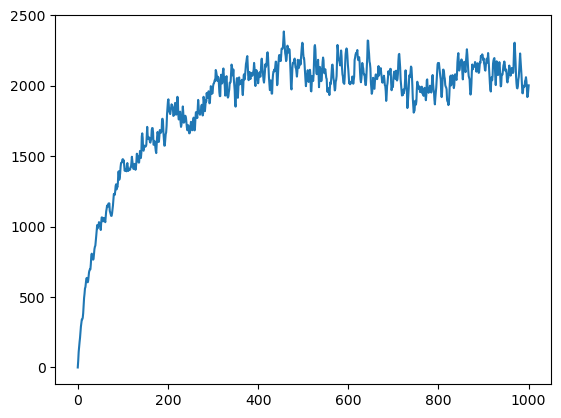

In [125]:
import matplotlib.pyplot as plt

traj = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_2100.traj", index=":")

energies = [mol.get_temperature() for mol in traj]
plt.plot(energies)
plt.show()

In [122]:
traj_dftb_2100 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_2100.traj", index = ":")

In [123]:
initial_structure = io.read("/home/qklmn/data/starting_configuration/1.cif")

In [126]:
print(*traj_dftb_2100[0].get_chemical_symbols() )
print(*initial_structure.get_chemical_symbols() )

Si Si Si Si Si Si C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C N N N N N N O O O O O O H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H
Si Si Si Si Si Si C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C N N N N N N O O O O O O H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H 

False